In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

np.random.seed(10)
(x_train, y_train), (x_test, y_test) = mnist.load_data()#下载数据集mnist.npz,或者把mnist.npz放在相同目录下

x_Train4D=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')# 60000，28，28，1
x_Test4D=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')#10000，28，28，1
# 归一化
x_Train = x_Train4D / 255
x_Test = x_Test4D / 255
# one-hot Encoding化作独热码
y_Train = np_utils.to_categorical(y_train)
y_Test = np_utils.to_categorical(y_test)
#数据集：训练集x_Train y_Train  测试集x_Test   y_Test

Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
# 模型框架
model = Sequential()
# 加层
# 卷积层1，输入28，28 输出 28，28
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same', input_shape=(28,28,1), activation='relu'))
# 池化层1，输入图片28，28 输出14，14
model.add(MaxPooling2D(pool_size=(2, 2)))
# 卷积层2，输入图片14，14 输出 14，14
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))
# 池化层2，输入图片14，14 输出7，7
model.add(MaxPooling2D(pool_size=(2, 2)))
# 加入dropout，丢25%
model.add(Dropout(0.25))
# 36*7*7 转化为一维向量，1764个float
model.add(Flatten())
# 全连接，128
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(10,activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

train_history=model.fit(x=x_Train, 
                        y=y_Train,
                        validation_split=0.2, 
                        epochs=2, batch_size=30)

Epoch 1/2
1600/1600 [==============================] - 36s 22ms/step - loss: 0.5016 - accuracy: 0.8364 - val_loss: 0.0625 - val_accuracy: 0.9814
Epoch 2/2
1600/1600 [==============================] - 41s 26ms/step - loss: 0.0998 - accuracy: 0.9710 - val_loss: 0.0500 - val_accuracy: 0.9846


In [4]:
#保存模型
model.save("model-1.h5")#HDF5文件

In [5]:
#模型载入包
from tensorflow.keras.models import load_model#若不加tensorflow，则会发生错误__init__() got an unexpected keyword argument 'ragged'
#载入模型
model=load_model("model-1.h5")

In [63]:
from tensorflow.keras import layers
from tensorflow.keras.layers import*
import matplotlib.pyplot as plt
#可视化中间层
#1  可视化每层的输出，需要创建一个新的层，输入包含两个部分：输入为前一层的输入，输出为前一层所有的中间层
output_layers = [layer.output for layer in model.layers[:-5]]

In [64]:
#2  创建一个新的模型，一个输入，多个输出（输出多个层）
new_model = models.Model(inputs=model.input, outputs=output_layers)


In [65]:
#3  预测每一层的输出
pred_2 = new_model.predict(x_Test[2].reshape([1,28,28,1]))#预测测试集集的第2张图

pred_4 = new_model.predict(x_Test[4].reshape([1,28,28,1]))#预测测试集集的第4张图

In [66]:
#4  抽取预测结果的第一层（原模型的第一层）
first_layer = pred_2[0]#0为第一层

first_layer.shape # 16:通道数

(1, 28, 28, 16)

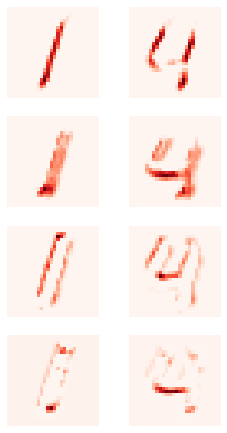

In [67]:
#5  显示两张以上的图片，第一层的4个通道的图片
rows = 36 # 4行
cols = 2

fig = plt.figure(figsize=(2*cols, 2*rows))#一个画布

for i in range(4):
    fig.add_subplot(rows, cols , 2*i+1)
    plt.imshow(pred_2[0][0,:,:,i].reshape([28,28,1]),cmap="Reds")
    plt.axis("off")
    
    fig.add_subplot(rows, cols , 2*i+2)
    plt.imshow(pred_4[0][0,:,:,i].reshape([28,28,1]),cmap="Reds")
    plt.axis("off")
    
#     plt.savefig("layer_compare"+str(i)+".png")# 保存图片



In [68]:
first_layer.shape[2]

28

In [78]:
#7  定义可视化函数
def plot_layer(layer,i, layer_name=None):
    rows = layer.shape[-1]/4 #layer.shape[-1]表示层的通道数
    cols = 9# 列数
    fig = plt.figure(figsize=(cols, rows))#画布大小
    for i in range(layer.shape[-1]):#循环显示一层的每个通道的图片
        fig.add_subplot(rows,cols,i+1)#第i个位置显示
        plt.imshow(layer[0,:,:,i].reshape(layer.shape[2],layer.shape[2]),cmap="Blues")
        plt.axis("off")
    fig.suptitle(layer_name, fontsize=14)
#     fig.savefig("inter layer"+str(i)+".png")# 保存图片
    plt.show()

<ipython-input-78-a026de63c44d>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  fig.add_subplot(rows,cols,i+1)#第i个位置显示


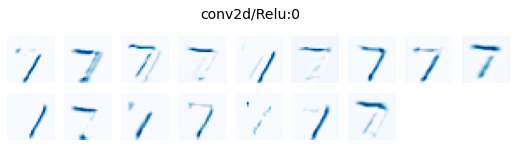

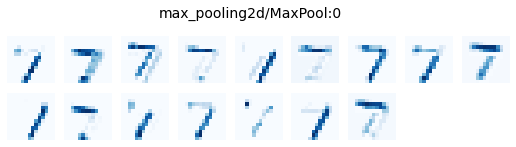

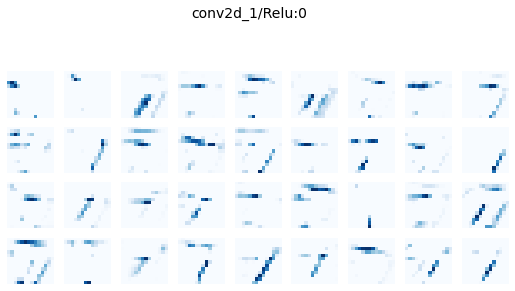

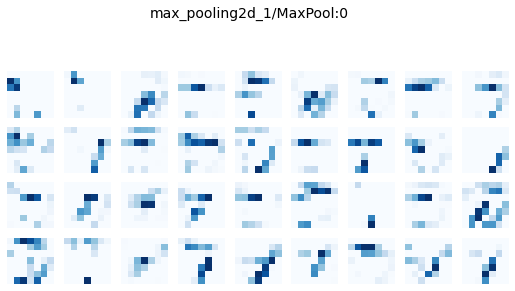

In [80]:
#8  可视化所有层
for i ,layer in enumerate(new_model.predict(x_Test[0].reshape([1,28,28,1]))):
    #layer:模型的每一层， i ：索引， output_layer[i].name：每一层的名称
    plot_layer(layer,i,output_layers[i].name)

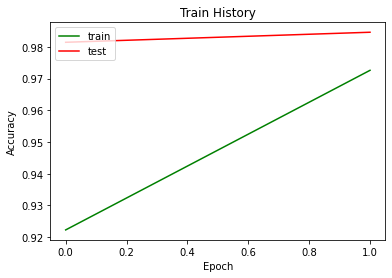

In [6]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc],"g")
    plt.plot(train_history.history[test_acc],"r")
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left') 
    #plt.savefig('1.png')
    plt.show()
#调用准确率
show_train_history('accuracy','val_accuracy')
#调用损失
# show_train_history('loss','val_loss')

In [7]:
#评估模型的precision
scores = model.evaluate(x_Test4D, y_Test)
print(scores[0])
print(scores[1])

313/313 [==============================] - 2s 7ms/step - loss: 10.9079 - accuracy: 0.9804
10.907899856567383
0.980400025844574


In [8]:
#评估模型
loss,accuracy=model.evaluate(x_Test , y_Test)
print("\ntest loss:",loss)
print("accuracy:",accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0414 - accuracy: 0.9877

test loss: 0.041361670941114426
accuracy: 0.9876999855041504


In [9]:
#预测前10项的结果
prediction=model.predict_classes(x_Test)
prediction[:10]


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [10]:
#可视化预测结果
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()


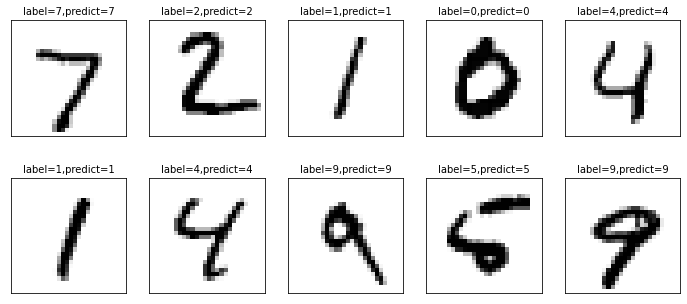

In [11]:
#调用
plot_images_labels_prediction(x_test,y_test,prediction,idx=0)


In [12]:
#Confusion Matrix
import pandas as pd
a = pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])
print(a)

predict    0     1     2    3    4    5    6     7    8    9
label                                                       
0        972     0     2    0    0    0    4     1    1    0
1          0  1132     2    0    0    0    1     0    0    0
2          0     0  1028    0    1    0    0     1    2    0
3          0     0     4  995    1    5    0     3    2    0
4          0     0     0    0  980    0    0     0    2    0
5          2     0     0    2    0  882    4     1    0    1
6          1     2     0    0    2    1  951     0    1    0
7          0     2    13    1    1    0    0  1010    1    0
8          1     0     3    0    1    0    1     1  966    1
9          3     4     1    2   18    3    0     6   11  961


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


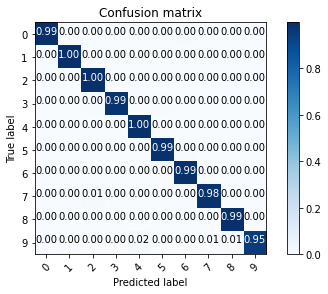

In [13]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()#显示彩条
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 显示混淆矩阵
def plot_confuse(model, x_val, y_val):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))
    
# x_Test4D_normalize.shape	# (10000, 32, 32, 1)
# y_TestOneHot.shape	# (10000, 10)
plot_confuse(model, x_Test, y_Test)



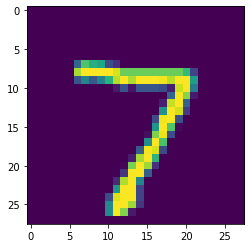

y_test[0].lable:  7


In [15]:
import matplotlib.pyplot as plt

plt.imshow(x_Test[0])
plt.show()
print("y_test[0].lable: ",y_test[0])
